In [1]:
path='/content/drive/MyDrive/Reconocimiento Patrones/Tarea1/'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#alternatively https://www.kaggle.com/sulianova/cardiovascular-disease-dataset can be used
df = pd.read_csv (path+'cardio_train.csv',sep=';')#csv data is separated into columns
#display(df) #print cvs data

""" 
Data must be formated to a readable format

Age         | int (days)
Height      | int (cm)
Weight      | float (kg)
Gender      | categorical code | 1: woman 2: men
Systolic blood pressure   | int | normal:120
Diastolic blood pressure  | int | normal: 80
Cholesterol       | 1: normal, 2: above normal, 3: well above normal
Glucose           | 1: normal, 2: above normal, 3: well above normal
Smoking           | binary | 0: No 1: Yes
Alcohol intake    | binary | 0: No 1: Yes
Physical activity | binary | 0: No 1: Yes
Presence of cardiovascular disease | binary | 0: No 1: Yes
""";
df['age']=df['age'].apply(lambda x: round(x/365)) #modify the ages from days to years
df.drop('id', inplace=True, axis=1) #delete the id column; in place true means the operations overwrites the original df, on false it returns a copy and the original remains the same
display(df)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
sick=df[df.columns][df['cardio']==1] #gets all the data that have any cardiac condition
healty=df[df.columns][df['cardio']==0] #healthy people
display(sick)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
7,62,2,178,95.0,130,90,3,3,0,0,1,1
15,46,2,172,112.0,120,80,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,0,1,1
69994,58,1,165,80.0,150,80,1,1,0,0,1,1
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1


In [4]:
sick.drop('cardio', inplace=False, axis=1).mean()#pandas datraframe mean

age             54.948083
gender           1.353441
height         164.270334
weight          76.822368
ap_hi          137.212042
ap_lo          109.023929
cholesterol      1.517396
gluc             1.277595
smoke            0.083736
alco             0.052117
active           0.789559
dtype: float64

Mean vector calculation

In [5]:
analysis=sick.drop('cardio', inplace=False, axis=1).to_numpy() #drop cardio and convert to numpy and then transpose
v_ones=np.ones((analysis.shape[0],1))

#print(analysis.transpose().shape)
#print(v_ones.shape)

mean_vector=np.multiply((1/analysis.shape[0]),np.dot(analysis.transpose(),v_ones)) #the matrix of info is already in rows representation thus it does not requiere the transpose
#print(mean_vector.shape)
np.set_printoptions(suppress=True)
print(mean_vector) #mean vector is in the form of a vector


[[ 54.94808314]
 [  1.35344064]
 [164.27033363]
 [ 76.82236771]
 [137.21204151]
 [109.02392864]
 [  1.51739615]
 [  1.27759513]
 [  0.08373596]
 [  0.05211698]
 [  0.78955945]]


variance and covariance matrix calculation

In [6]:
#get the variance which is the diagonal of the covariance matrix
sick.drop('cardio', inplace=False, axis=1).var()

age               40.311731
gender             0.228527
height            68.394297
weight           223.805354
ap_hi          36591.713771
ap_lo          47439.133998
cholesterol        0.602726
gluc               0.390147
smoke              0.076726
alco               0.049402
active             0.166160
dtype: float64

In [7]:
sick.drop('cardio', inplace=False, axis=1).cov()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,40.311731,-0.136033,-5.664591,-3.901845,-8.928782,-13.199227,0.464909,0.263483,-0.099375,-0.046211,-0.017215
gender,-0.136033,0.228527,2.050199,1.066913,0.529234,1.150557,-0.017456,-0.009861,0.043049,0.017144,-0.000295
height,-5.664591,2.050199,68.394297,34.315200,11.472295,0.067492,-0.364872,-0.159241,0.437280,0.174858,-0.041199
weight,-3.901845,1.066913,34.315200,223.805354,39.773929,129.134890,1.271872,0.814249,0.323309,0.244817,-0.077968
ap_hi,-8.928782,0.529234,11.472295,39.773929,36591.713771,557.897608,1.450554,0.732720,0.007431,0.073573,0.438014
ap_lo,-13.199227,1.150557,0.067492,129.134890,557.897608,47439.133998,1.353420,0.355900,0.696121,1.000268,1.577910
cholesterol,0.464909,-0.017456,-0.364872,1.271872,1.450554,1.353420,0.602726,0.210049,0.004761,0.008142,0.010851
gluc,0.263483,-0.009861,-0.159241,0.814249,0.732720,0.355900,0.210049,0.390147,-0.000660,0.002486,0.000583
smoke,-0.099375,0.043049,0.437280,0.323309,0.007431,0.696121,0.004761,-0.000660,0.076726,0.019193,0.001669
alco,-0.046211,0.017144,0.174858,0.244817,0.073573,1.000268,0.008142,0.002486,0.019193,0.049402,0.002077


In [8]:
s=np.zeros((analysis.shape[1],analysis.shape[1]))
for a in range(analysis.shape[0]):
  a=analysis[a].reshape(analysis.shape[1],1)
  b=np.subtract(a,mean_vector)
  mf=np.dot(b,b.transpose())
  s=np.add(s,mf)
s=np.multiply((1/analysis.shape[0]),s)
print(s.diagonal().reshape(11,1))

[[   40.31057832]
 [    0.22852035]
 [   68.39234184]
 [  223.79895587]
 [36590.66766598]
 [47437.77778017]
 [    0.60270918]
 [    0.39013555]
 [    0.07672425]
 [    0.0494008 ]
 [    0.16615532]]


Correlation matrix calculation

In [9]:
display(sick.drop('cardio', inplace=False, axis=1).corr(method='kendall'))
"""
defaults to pearson
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
""";
#https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.033671,-0.074683,-0.020921,0.023103,-0.009478,0.066687,0.046576,-0.045948,-0.027792,-0.005721
gender,-0.033671,1.000000,0.459501,0.136242,0.040707,0.048255,-0.042959,-0.027976,0.325105,0.161354,-0.001515
height,-0.074683,0.459501,1.000000,0.205940,-0.009985,0.001048,-0.051473,-0.026424,0.166006,0.080453,-0.010582
weight,-0.020921,0.136242,0.205940,1.000000,0.141140,0.143192,0.091756,0.077935,0.067491,0.063300,-0.009695
ap_hi,0.023103,0.040707,-0.009985,0.141140,1.000000,0.612396,0.089476,0.039305,0.047901,0.047388,0.036945
ap_lo,-0.009478,0.048255,0.001048,0.143192,0.612396,1.000000,0.075457,0.032033,0.045429,0.059959,0.033958
cholesterol,0.066687,-0.042959,-0.051473,0.091756,0.089476,0.075457,1.000000,0.378192,0.025828,0.049139,0.030065
gluc,0.046576,-0.027976,-0.026424,0.077935,0.039305,0.032033,0.378192,1.000000,0.002770,0.026383,0.000346
smoke,-0.045948,0.325105,0.166006,0.067491,0.047901,0.045429,0.025828,0.002770,1.000000,0.311751,0.014782
alco,-0.027792,0.161354,0.080453,0.063300,0.047388,0.059959,0.049139,0.026383,0.311751,1.000000,0.022919


In [10]:
display(sick.drop('cardio', inplace=False, axis=1).corr())

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.044819,-0.107880,-0.041079,-0.007352,-0.009545,0.094317,0.066439,-0.056505,-0.032746,-0.006652
gender,-0.044819,1.000000,0.518582,0.149185,0.005787,0.011050,-0.047034,-0.033024,0.325105,0.161354,-0.001515
height,-0.107880,0.518582,1.000000,0.277358,0.007252,0.000037,-0.056829,-0.030827,0.190888,0.095127,-0.012221
weight,-0.041079,0.149185,0.277358,1.000000,0.013899,0.039631,0.109509,0.087138,0.078021,0.073626,-0.012785
ap_hi,-0.007352,0.005787,0.007252,0.013899,1.000000,0.013390,0.009767,0.006132,0.000140,0.001730,0.005617
ap_lo,-0.009545,0.011050,0.000037,0.039631,0.013390,1.000000,0.008004,0.002616,0.011538,0.020662,0.017773
cholesterol,0.094317,-0.047034,-0.056829,0.109509,0.009767,0.008004,1.000000,0.433158,0.022142,0.047184,0.034289
gluc,0.066439,-0.033024,-0.030827,0.087138,0.006132,0.002616,0.433158,1.000000,-0.003813,0.017904,0.002288
smoke,-0.056505,0.325105,0.190888,0.078021,0.000140,0.011538,0.022142,-0.003813,1.000000,0.311751,0.014782
alco,-0.032746,0.161354,0.095127,0.073626,0.001730,0.020662,0.047184,0.017904,0.311751,1.000000,0.022919


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5020dac350>,
      dtype=object)

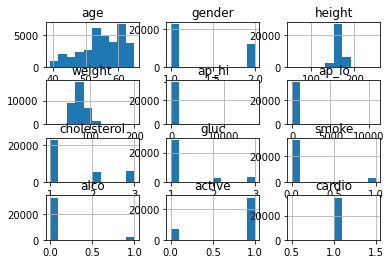

In [11]:
sick.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5020ae4850>,
      dtype=object)

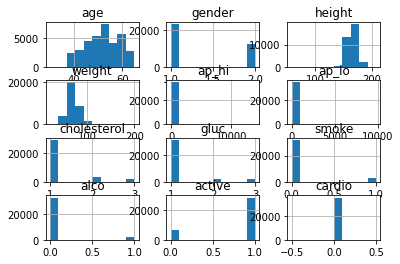

In [12]:
healty.hist()

Partial correlation

In [13]:
#!pip install pingouin
import pingouin as pg
sick.drop('cardio', inplace=False, axis=1).pcorr().round(7)
#https://www.machinelearningplus.com/statistics/partial-correlation/


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,0.028196,-0.086517,-0.023233,-0.007326,-0.008665,0.073307,0.028700,-0.038409,-0.016774,-0.009925
gender,0.028196,1.000000,0.474251,0.001909,0.003163,0.009486,-0.028293,-0.009819,0.244370,0.056813,0.000960
height,-0.086517,0.474251,1.000000,0.239643,0.002184,-0.016729,-0.050652,-0.008704,0.019304,-0.002448,-0.009276
weight,-0.023233,0.001909,0.239643,1.000000,0.010438,0.039637,0.096834,0.049069,0.009133,0.036959,-0.015708
ap_hi,-0.007326,0.003163,0.002184,0.010438,1.000000,0.012698,0.007535,0.001942,-0.002995,0.000013,0.005269
ap_lo,-0.008665,0.009486,-0.016729,0.039637,0.012698,1.000000,0.002841,-0.002209,0.002329,0.015196,0.017437
cholesterol,0.073307,-0.028293,-0.050652,0.096834,0.007535,0.002841,1.000000,0.421284,0.029760,0.037560,0.036845
gluc,0.028700,-0.009819,-0.008704,0.049069,0.001942,-0.002209,0.421284,1.000000,-0.010409,0.001510,-0.012773
smoke,-0.038409,0.244370,0.019304,0.009133,-0.002995,0.002329,0.029760,-0.010409,1.000000,0.274185,0.009099
alco,-0.016774,0.056813,-0.002448,0.036959,0.000013,0.015196,0.037560,0.001510,0.274185,1.000000,0.018471


PCA analysis

In [14]:

import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')



In [15]:

datos=sick.drop('cardio', inplace=False, axis=1)

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)


modelo_pca = pca_pipe.named_steps['pca']



In [16]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
PC1,0.141787,-0.553858,-0.532194,-0.307108,-0.013830,-0.033099,0.022395,0.024110,-0.436868,-0.319932,-0.003495
PC2,0.199262,-0.056869,-0.060617,0.218471,0.024496,0.034121,0.676302,0.656022,0.045342,0.107605,0.050091
PC3,-0.091361,0.094298,0.361799,0.445064,0.069890,-0.017136,-0.003226,0.073243,-0.462817,-0.593752,-0.276562
PC4,-0.285635,-0.096434,-0.033902,0.126698,0.479247,0.667886,-0.007347,-0.038765,-0.078337,-0.016133,0.456299
PC5,0.109983,0.012825,-0.043769,-0.105528,0.864885,-0.308095,-0.009101,-0.001578,0.082803,0.085056,-0.342874
PC6,0.175764,-0.045524,-0.103934,0.013244,-0.105101,0.635101,-0.043071,-0.031324,0.080835,0.147767,-0.714460
PC7,0.874369,0.230579,0.129936,-0.044549,0.073924,0.157819,-0.082872,-0.136487,-0.047185,-0.159316,0.282788
PC8,-0.183139,0.363235,0.156751,-0.729298,0.008058,0.165711,0.118450,0.274089,0.094425,-0.387638,-0.047048
PC9,0.002475,-0.110269,-0.268634,0.242124,0.001627,-0.014270,0.052236,-0.124502,0.714203,-0.573164,0.002849
PC10,0.055736,-0.070325,-0.049406,0.088561,0.005794,-0.000820,-0.718071,0.672245,0.107267,-0.003178,0.050734


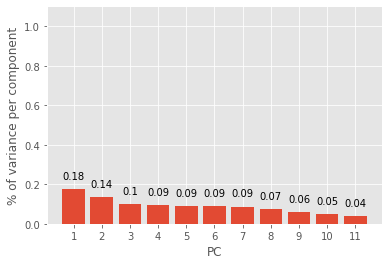

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_xlabel('PC')
ax.set_ylabel('% of variance per component');

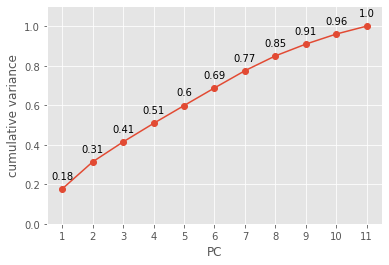

In [18]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_xlabel('PC')
ax.set_ylabel('cumulative variance');

In [19]:


proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
1,1.015023,1.208012,-0.088833,0.387006,-0.221651,-0.406999,-0.230321,-0.697379,0.558868,-1.525150,0.266690
2,0.812293,0.613913,0.399711,-0.898577,0.651118,1.078179,-1.151635,0.683280,-0.080294,-1.854262,-0.672961
3,-1.134840,-1.009166,0.699813,0.496143,-0.309207,-0.727425,-0.274200,0.359918,-0.280505,0.021010,0.764050
7,-1.530380,3.392830,1.498541,-0.284318,-0.310806,-0.670888,1.091022,0.667256,-0.620593,0.469186,-0.039196
15,-1.974642,-0.785674,2.421440,-0.428012,0.162456,0.916980,-1.311671,-0.889094,0.100878,0.037830,0.911886
